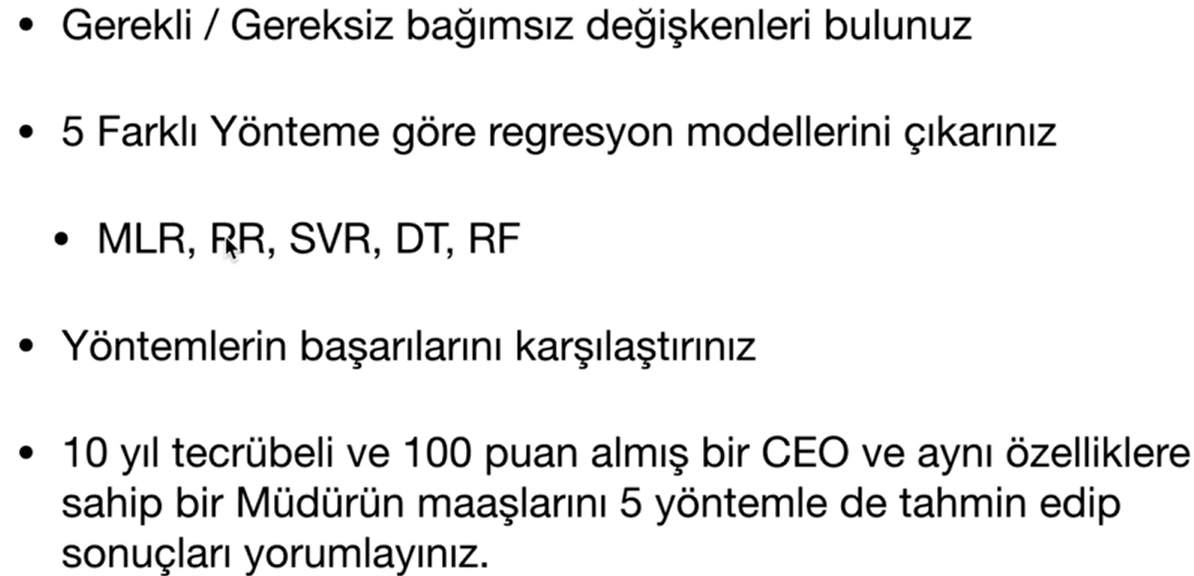

In [28]:
# Kütüphaneler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [29]:
# veri yukleme

veriler = pd.read_csv('veriler/maaslar_yeni.csv')
veriler

,Calisan ID,unvan,UnvanSeviyesi,Kidem,Puan,maas
0,1,Cayci,1,5,70,2250
1,2,Sekreter,2,5,70,2500
2,3,Uzman Yardimcisi,3,5,70,3000
3,4,Uzman,4,5,70,4000
4,5,Proje Yoneticisi,5,5,70,5500
5,6,Sef,6,5,70,7500
6,7,Mudur,7,5,70,10000
7,8,Direktor,8,5,70,15000
8,9,C-level,9,5,70,25000
9,10,CEO,10,5,70,50000


In [47]:
# Burada 1. sütunu almamamızın nedeni algoritma öğrenmede ezberlemeye gider diye almıyoruz. Ünvanı da almıyoruz zaten seviyeye göre ünvanlar belirlenmiş, dummy variable hatasına düşmeyelim.

x = veriler.iloc[:,2:3] # bağımsız değişkenlerim
y = veriler.iloc[:,5:] # Bağımlı(aradığım) değişken
X = x.values
Y = y.values

In [54]:
print(veriler.corr())

               Calisan ID  UnvanSeviyesi     Kidem      Puan      maas
Calisan ID       1.000000       0.331847  0.206278 -0.251278  0.226287
UnvanSeviyesi    0.331847       1.000000 -0.125200  0.034948  0.727036
Kidem            0.206278      -0.125200  1.000000  0.322796  0.117964
Puan            -0.251278       0.034948  0.322796  1.000000  0.201474
maas             0.226287       0.727036  0.117964  0.201474  1.000000


Şimdi seçdiğimiz sütunlar gerçekten bizim işimize yarıyacak sütunlar mı? Bunu bulmak için p-değerlerine bakmak lazım.

In [48]:
# linear regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)


model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())

print('\nLinear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                              468.1
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                    1.93e-19
Time:                        18:16:25   Log-Likelihood:                         -287.43
No. Observations:                  30   AIC:                                      576.9
Df Residuals:                      29   BIC:                                      578.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)


#tahminler


print('\npoly OLS')
model2=sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
print(model2.fit().summary())

print('\nPolynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.56

In [50]:
# SVR

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc1=StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))


from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)


print('SVR OLS')
model3=sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
print(model3.fit().summary())


print('\nSVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


SVR OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.762
Method:                 Least Squares   F-statistic:                              97.19
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                    9.11e-11
Time:                        18:16:25   Log-Likelihood:                         -1.3680
No. Observations:                  30   AIC:                                      4.736
Df Residuals:                      29   BIC:                                      6.137
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [51]:
#Decision Tree Regresyon

from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)


print('Decision Tree OLS')
model4=sm.OLS(r_dt.predict(X),X)
print(model4.fit().summary())

print('\nDecision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

Decision Tree OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              87.29
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                    3.01e-10
Time:                        18:16:25   Log-Likelihood:                         -312.62
No. Observations:                  30   AIC:                                      627.2
Df Residuals:                      29   BIC:                                      628.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [52]:
#Random Forest Regresyonu

from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())



print('Random Forest OLS')
model5=sm.OLS(rf_reg.predict(X),X)
print(model5.fit().summary())



print('\nRandom Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

Random Forest OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              74.13
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                    1.75e-09
Time:                        18:16:26   Log-Likelihood:                         -315.35
No. Observations:                  30   AIC:                                      632.7
Df Residuals:                      29   BIC:                                      634.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [53]:
#Ozet R2 değerleri

print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

print('\nPolynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

print('\nSVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


print('\nDecision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

print('\nRandom Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

Linear R2 degeri
0.5285811733746243

Polynomial R2 degeri
0.8174873280442541

SVR R2 degeri
0.5841869084594333

Decision Tree R2 degeri
0.8343186200100907

Random Forest R2 degeri
0.8284081476481634
